<a href="https://colab.research.google.com/github/akiumiann/googlecolab/blob/main/%E3%83%91%E3%83%A9%E3%83%A1%E3%82%BF%E3%83%BC%E5%88%86%E5%B2%90%E8%A7%A3%E6%9E%90%E3%81%8A%E3%82%88%E3%81%B3Krylov_%E9%83%A8%E5%88%86%E7%A9%BA%E9%96%93%E6%B3%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

第 1 問 (パラメター分岐解析)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def f(x):
  return x
def g(x):
  return np.tanh(x)
def df_1(x):
  return 1
def dg_1(x):
  return 1.0/(np.cosh(x)**2)

In [ ]:
def calc_damped_Newton_method(x1, mu):
  B=np.array(range(10))
  X1=np.array(range(10))
  x2 = x1
  for b in range(1,10,1):
   B[b]=b
   print(B)
   for i in range (1000):
     x0 = x1 - mu*((f(x1)-g(b*x1))/(df_1(x1)-b*dg_1(b*x1)))
     # err = abs(x1 - x0)
     err = abs(f(x0)-g(b*x0)) #残差
     if err < 1.e-10:
          X1[b]=round(x1)
          print(X1)
          print('Converged! Iterations = ', i)
          break
     x1 = x0

     if i == 999: # 収束しなかった場合
      print("NOT Converged!!!")
      print(f"x0 = {x0}")
      print(f"f(x0) = {f(x0)}")
      print(f"g(x0) = {g(x0)}")
      print(f"err = {err}")
      return x0
   print(x1)
   x1 = x2

  print(B)
  print(X1)
  plt.xlim([0, 9])
  plt.ylim([-0.5,1.5])
  plt.plot(B,X1)
  plt.axhline(y=0, c="k") # x軸をプロット
  plt.xlabel("b")
  #plt.ylabel("f(x)-g(x)")

[0 1 2 3 4 5 6 7 8 9]
[0 0 2 3 4 5 6 7 8 9]
Converged! Iterations =  25
0.0007673930118474885
[0 1 2 3 4 5 6 7 8 9]
[0 0 1 3 4 5 6 7 8 9]
Converged! Iterations =  15
0.9575040244338558
[0 1 2 3 4 5 6 7 8 9]
[0 0 1 1 4 5 6 7 8 9]
Converged! Iterations =  15
0.9949015287002949
[0 1 2 3 4 5 6 7 8 9]
[0 0 1 1 1 5 6 7 8 9]
Converged! Iterations =  15
0.9993256732476008
[0 1 2 3 4 5 6 7 8 9]
[0 0 1 1 1 1 6 7 8 9]
Converged! Iterations =  15
0.9999091219451297
[0 1 2 3 4 5 6 7 8 9]
[0 0 1 1 1 1 1 7 8 9]
Converged! Iterations =  15
0.9999877100678237
[0 1 2 3 4 5 6 7 8 9]
[0 0 1 1 1 1 1 1 8 9]
Converged! Iterations =  15
0.9999983371346121
[0 1 2 3 4 5 6 7 8 9]
[0 0 1 1 1 1 1 1 1 9]
Converged! Iterations =  15
0.9999997751582435
[0 1 2 3 4 5 6 7 8 9]
[0 0 1 1 1 1 1 1 1 1]
Converged! Iterations =  15
0.9999999697694005
[0 1 2 3 4 5 6 7 8 9]
[0 0 1 1 1 1 1 1 1 1]


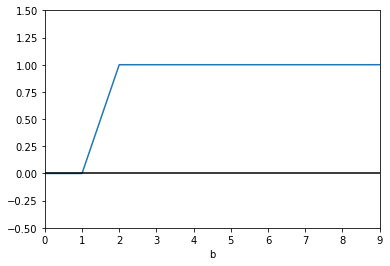

In [ ]:
x1 = 8.0
mu = 0.8
calc_damped_Newton_method(x1, mu)

第 2 問 (連立 1 次方程式の反復解法, Krylov 部分空間法)

In [ ]:


def ConjugateGradientMethod(a,b1,c,d,e,f,g,h,i):
  A = np.array([
    [4,-1,0,0,0,0,0,0,0],
    [-1,4,-1,0,0,0,0,0,0],
    [0,-1,4,-1,0,0,0,0,0],
    [0,0,-1,4,-1,0,0,0,0],
    [0,0,0,-1,4,-1,0,0,0],
    [0,0,0,0,-1,4,-1,0,0],
    [0,0,0,0,0,-1,4,-1,0],
    [0,0,0,0,0,0,-1,4,-1],
    [0,0,0,0,0,0,0,-1,4]
  ])

  bT = np.array([
    [3,2,2,2,2,2,2,2,3]
  ])

  b = bT.T
  x0T = np.array([0,0,0,0,0,0,0,0,0])
  x0 = x0T.T
  xnT = np.array([0,0,0,0,0,0,0,0,0])
  xn = xnT.T
  rnT = np.array([a,b1,c,d,e,f,g,h,i])
  rn = rnT.T
  pnT = np.array([a,b1,c,d,e,f,g,h,i])
  pn = pnT.T
  r0T = bT - A@x0
  p0T = r0T
  r0 = r0T.T
  p0 = p0T.T

  for k in range (100):
    q0 = A@p0
    a0 = (r0T@p0)/(p0T@A@p0)
    print('q',q0)
    #print('a',a0)
    x0 = a0*p0
    x0T = x0.T
    x0T = x0T + xn
    #print('x0T',x0T)
    rn = r0 - a0*A@p0
    #print('rn',rn)
    if abs(all(rn < 1.0e-6)):
        print('Converged! Iterations = ', k)
        break
    rnT = rn.T
    r0T = r0.T
    #print('rnT',rnT)
    b0 = (rnT@rn)/(r0T@r0)
    pn = rn + b0*p0
    pnT = pn.T
    p0 = pn
    r0 = rn
    p0T = pnT
    r0T = rnT
    xn = x0T

  return x0T

In [ ]:
ConjugateGradientMethod(1,2,3,4,5,6,7,8,9)

q [[10]
 [ 3]
 [ 4]
 [ 4]
 [ 4]
 [ 4]
 [ 4]
 [ 3]
 [10]]
q [[-4.2684949 ]
 [ 4.09980867]
 [ 0.6747449 ]
 [ 1.08545918]
 [ 1.08545918]
 [ 1.08545918]
 [ 0.6747449 ]
 [ 4.09980867]
 [-4.2684949 ]]
q [[-0.21877103]
 [-0.87508412]
 [ 0.94833366]
 [ 0.13633911]
 [ 0.23713579]
 [ 0.13633911]
 [ 0.94833366]
 [-0.87508412]
 [-0.21877103]]
q [[-0.01287753]
 [-0.05151012]
 [-0.19316294]
 [ 0.25295732]
 [ 0.02206406]
 [ 0.25295732]
 [-0.19316294]
 [-0.05151012]
 [-0.01287753]]
q [[-0.00075923]
 [-0.00303692]
 [-0.01138843]
 [-0.04251682]
 [ 0.11616202]
 [-0.04251682]
 [-0.01138843]
 [-0.00303692]
 [-0.00075923]]
Converged! Iterations =  4


array([[1., 1., 1., 1., 1., 1., 1., 1., 1.]])